<a href="https://colab.research.google.com/github/yakushinav/mfc_ml/blob/main/iris_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS-Flower-classification

Этот проект представляет собой применение машинного обучения с программированием на Python на примере классификации цветов IRIS с использованием машинного обучения с инструментами scikit. 
Здесь используются алгоритмы, которые представляют собой некоторые типы машинного обучения с учителем и без учителя. 
Алгоритмы, используемые для классификации и прогнозирования:

- [Деревья решений](https://scikit-learn.org/stable/modules/tree.html)
- [Найвный байесовский классификатор](https://scikit-learn.org/stable/modules/naive_bayes.html)
- [Метод K ближайших соседей](https://scikit-learn.org/stable/modules/neighbors.html)
- [SVM метод опорных векторов](https://scikit-learn.org/stable/modules/svm.html)
- [Логистическая регрессия](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- [Линейный дискриминантный анализ](https://scikit-learn.org/stable/modules/lda_qda.html)

[Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном. Этот набор данных стал классическим и часто используется в литературе для иллюстрации работы различных статистических алгоритмов. 

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

- Длина наружной доли околоцветника (англ. sepal length);
- Ширина наружной доли околоцветника (англ. sepal width);
- Длина внутренней доли околоцветника (англ. petal length);
- Ширина внутренней доли околоцветника (англ. petal width).

На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений. Это задача многоклассовой классификации, так как имеется три класса — три вида ириса.

Один из классов (Iris setosa) линейно-разделим от двух остальных.

[дополнительно почитать](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D0%B1%D1%89%D0%B8%D0%B5_%D0%BF%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D1%8F)

В качестве задания вам предлагается повторить данные действия по визуализации и классификации для наборов данных (можно выбрать, что больше понравится, но лучше сделать для всех)
- [User Knowledge Modeling Data Set](http://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)
- [Blood Transfusion Service Center Data Set](http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)
- [Somerville Happiness Survey Data Set](http://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey)
- [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality)



In [4]:
# Подключаем библиотеки
import pandas as pd # Работа с набором данных
import numpy as np # Линейная алгебра
# Визуализация данных
import seaborn as sns 
import matplotlib.pyplot as plt

# отключение информационных сообщений
from warnings import filterwarnings
filterwarnings(action='ignore')

# разделение выборки
from sklearn.model_selection import train_test_split
#деревья решений
from sklearn.tree import DecisionTreeClassifier, plot_tree
#метрики
from sklearn import metrics
#Наивный байесовский классификатор
from sklearn.naive_bayes import GaussianNB
#Линейный дискриминантный анализ
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
#Метод ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
#SVC - метод опорных векторов
from sklearn.svm import SVC
#Логистическая регрессия
from sklearn.linear_model import LogisticRegression

In [5]:
# читаем данные
url = 'https://github.com/yakushinav/mfc_ml/raw/main/iris.csv'
data = pd.read_csv(url)
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# типы полей
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
# Описательная статистика, применяется для числовых полей
data.describe()
# Найдите описательную статистику по каждоу классу отдельно (нужно использовать фильт данных в pandas)


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# количество объектов каждого класса
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

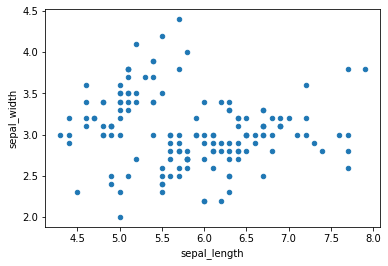

In [9]:
data.plot(kind='scatter',x='sepal_length', y='sepal_width') # создадим точечную диаграмму 
# далее постройте аналогичную диаграмму по petal_length	petal_width


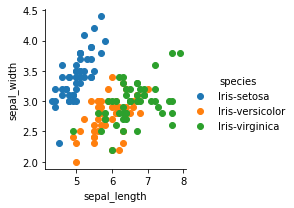

In [10]:
# используем seaborn FacetGrid чтобы отобразить элементы каждого класса
sns.FacetGrid(data, hue = 'species') \
    .map(plt.scatter, 'sepal_length','sepal_width') \
    .add_legend()
# далее постройте аналогичную диаграмму по petal_length	petal_width

  

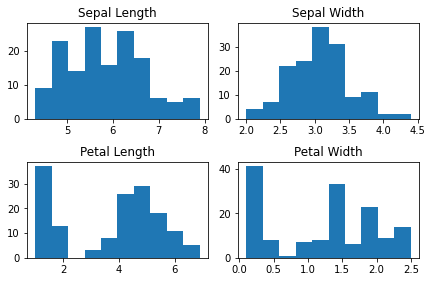

In [11]:
# Гистограммы по каждому параметру
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(data['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(data['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(data['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(data['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# добавим отступы между диаграммами
fig.tight_layout(pad=1.0);

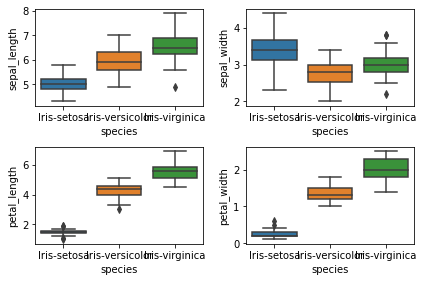

In [12]:
# диаграмма ящик с усами seaborn
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data = data, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = data, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = data, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = data,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

<Axes: xlabel='species', ylabel='petal_width'>

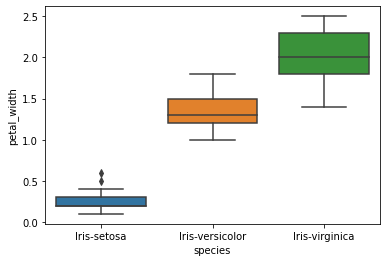

In [13]:
# Мы можем посмотреть на индивидуальный параметр в Seaborn через коробочную диаграмму.
sns.boxplot(x='species', y='petal_width', data=data)
# Постройте аналогичные диаграммы для остальных полей


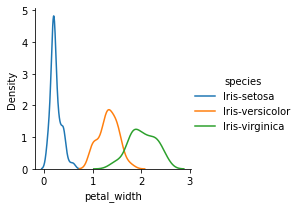

In [14]:
# Полезным  графиком для изучения одномерных отношений является kdeplot,
# который создает и визуализирует оценку плотности распределения

sns.FacetGrid(data, hue="species") \
   .map(sns.kdeplot, "petal_width") \
   .add_legend()
# Постройте аналогичные диаграммы для остальных полей


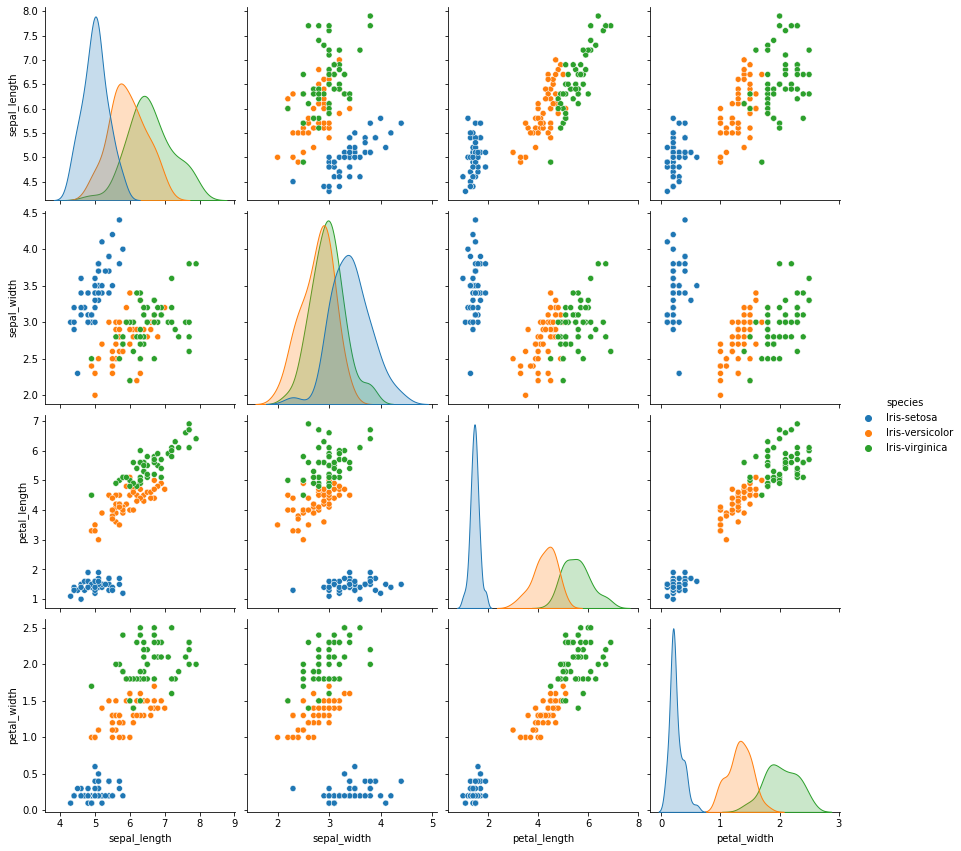

In [15]:
# двумерная связь
# матрица диаграммы рассеяния
sns.pairplot(data, hue='species', size=3)

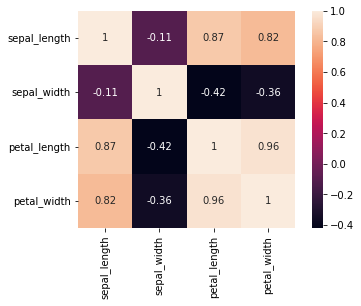

In [16]:
# Корреляционная матрица
corrmat = data.corr()
sns.heatmap(corrmat, annot = True, square = True);

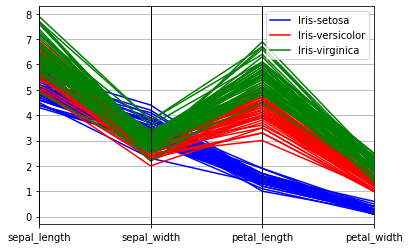

In [17]:
# parallel coordinates
pd.plotting.parallel_coordinates(data, "species", color = ['blue', 'red', 'green']);

In [18]:
# Take out a test set
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)
# Model development
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

accuracy (точность) классификатора Деревья решений 0.983
матрица ошибок
[[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]


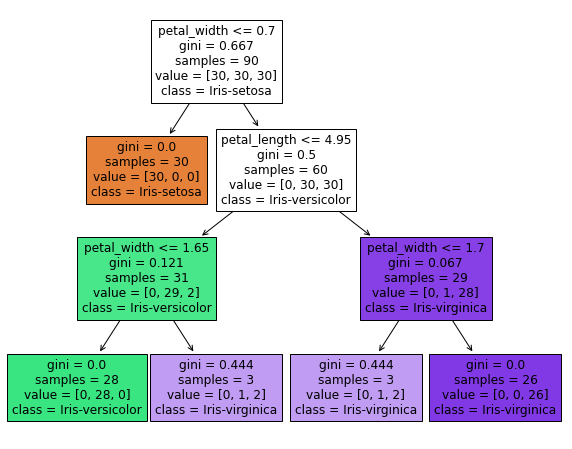

In [19]:
# Деревья решений
# Параметр random_state задает начальную инициализацию генератора псевдслучайных чисел, чтобы данные были одинаковые при каждом запуске

#Выбираем классификатор
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
#Проводим обучение
mod_dt.fit(X_train,y_train)
#Выполняем предсказание
y_pred=mod_dt.predict(X_test)

print('accuracy (точность) классификатора Деревья решений',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

# матрица ошибок
print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

# Визуализация деревьев решений
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

In [20]:
# Наивный байесовский классификатор
mod_gnb_all = GaussianNB()
y_pred = mod_gnb_all.fit(X_train, y_train).predict(X_test)
print('accuracy (точность) классификатора Наивный байес',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

# матрица ошибок
print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

accuracy (точность) классификатора Наивный байес 0.933
матрица ошибок
[[20  0  0]
 [ 0 19  1]
 [ 0  3 17]]


In [46]:
# Линейный дискриминантный анализ
mod_lda_all = LinearDiscriminantAnalysis()
y_pred = mod_lda_all.fit(X_train, y_train).predict(X_test)
print('accuracy (точность) классификатора LDA ',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

print(mod_lda_all.intercept_)
print(mod_lda_all.coef_)

# матрица ошибок
print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))


accuracy (точность) классификатора LDA  0.983
[ -6.04323394  -3.92033351 -41.3210986 ]
[[  6.32361417   9.610657   -17.46495871 -19.96252144]
 [ -1.3556569   -3.69530297   4.7397141    1.94664665]
 [ -4.96795728  -5.91535404  12.72524461  18.01587479]]
матрица ошибок
[[20  0  0]
 [ 0 20  0]
 [ 0  1 19]]


[ 34.2307707  -11.68340372 -57.1367406 ]
[[ -9.09793883 -15.69350758]
 [  2.59848548   0.0851665 ]
 [  6.49945335  15.60834108]]


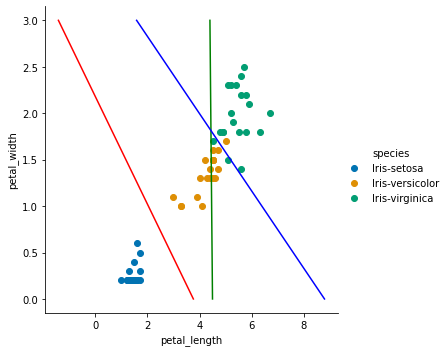

In [34]:
# LDA визуализация при размерности признаков 2 
mod_lda_1 = LinearDiscriminantAnalysis()
selected_predictors = ["petal_length", "petal_width"]
y_pred = mod_lda_1.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])

g = sns.FacetGrid(test, hue="species", height=5, palette = 'colorblind').map(plt.scatter,"petal_length", "petal_width", ).add_legend()
my_ax = g.ax

y1 = np.array([3, 0])

for i, c in enumerate(['r','g','b']):
    b, w1, w2 = mod_lda_1.intercept_[i], mod_lda_1.coef_[i][0], mod_lda_1.coef_[i][1]
    x1 = -(b+y1*w2)/w1    
    plt.plot(x1,y1,c=c)

In [35]:
# Квадратичный дискриминантный анализ
mod_qda_all = QuadraticDiscriminantAnalysis()
y_pred = mod_qda_all.fit(X_train, y_train).predict(X_test)
print('accuracy (точность) классификатора QDA ',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

# матрица ошибок
print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

accuracy (точность) классификатора QDA  0.983
матрица ошибок
[[20  0  0]
 [ 0 20  0]
 [ 0  1 19]]


In [36]:
# Метод ближайших соседей, k=5
mod_5nn=KNeighborsClassifier(n_neighbors=5) 
mod_5nn.fit(X_train,y_train)
y_pred=mod_5nn.predict(X_test)
print('accuracy (точность) классификатора KNN',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

# матрица ошибок
print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

accuracy (точность) классификатора KNN 0.933
матрица ошибок
[[20  0  0]
 [ 0 20  0]
 [ 0  4 16]]


In [50]:
# Метод опорных векторов, линейная модель

linear_svc = SVC(kernel='linear').fit(X_train, y_train)
y_pred=linear_svc.predict(X_test)
print('accuracy (точность) классификатора SVM',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

# матрица ошибок
print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))



accuracy (точность) классификатора SVM 1.000
[[-0.31344872  0.38738466 -0.72549472 -0.30899545]
 [-0.15449394  0.15924522 -0.4652571  -0.22983524]
 [ 0.59076155  0.16453026 -1.90712103 -1.8109542 ]]
матрица ошибок
[[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]


In [44]:
# Логистическая регрессия
mod_lr = LogisticRegression(solver = 'newton-cg').fit(X_train, y_train)
y_pred=mod_lr.predict(X_test)
print('accuracy (точность) классификатора Логистическая регрессия',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

# матрица ошибок
print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

accuracy (точность) классификатора Логистическая регрессия 0.950
матрица ошибок
[[20  0  0]
 [ 0 19  1]
 [ 0  2 18]]
